In [8]:
from tensorflow.keras.layers import Input ,Lambda,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.applications.resnet import preprocess_input

In [2]:
image_size = [224,224]

train_path = 'Datasets/train'
test_path = 'Datasets/test'

In [3]:
resnet = ResNet50(input_shape = image_size + [3],weights='imagenet',include_top = False)

94773248/94765736 [==============================] - 101s 1us/step


In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob("datasets/train/*")

In [6]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders),activation= 'softmax')(x)

model = Model(inputs=resnet.input,outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
    
    )

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size = (224,224),
                                                batch_size =32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
fit_model = model.fit_generator(training_set,validation_data=test_set,epochs=50,steps_per_epoch=len(training_set),validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 7s 4s/step - loss: 3.7508 - accuracy: 0.3906 - val_loss: 7.9276 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 6s 3s/step - loss: 9.5861 - accuracy: 0.3125 - val_loss: 4.1132 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 3.1877 - accuracy: 0.4844 - val_loss: 5.8615 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 3.1213 - accuracy: 0.3750 - val_loss: 1.4550 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 2.5879 - accuracy: 0.4844 - val_loss: 2.4678 - val_accuracy: 0.4138
Epoch 6/50
2/2 [==============================] - 6s 3s/step - loss: 2.9273 - accuracy: 0.5156 - val_loss: 1.4799 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 6s 3s/step - loss: 1.1276 - accuracy: 0.5625 - val_l

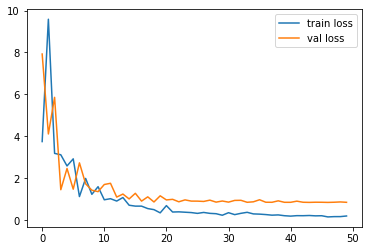

In [20]:
# loss
plt.plot(fit_model.history['loss'],label='train loss')
plt.plot(fit_model.history['val_loss'],label='val loss')
plt.legend()
plt.show()

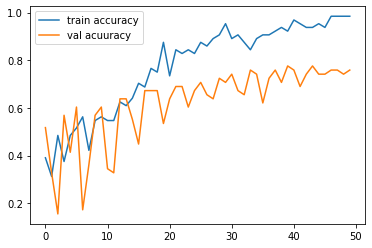

In [23]:
# accuracy
plt.plot(fit_model.history['accuracy'],label='train accuracy')
plt.plot(fit_model.history['val_accuracy'],label='val acuuracy')
plt.legend()
plt.show()

In [24]:
model.save('model_resnet50.h5')

In [25]:
ypred = model.predict(test_set)

In [26]:
ypred

array([[8.37432779e-03, 9.45045114e-01, 4.65804935e-02],
       [2.28084102e-02, 6.63499057e-01, 3.13692570e-01],
       [4.05496508e-02, 2.65777856e-01, 6.93672538e-01],
       [8.24105978e-01, 1.73040107e-01, 2.85390671e-03],
       [5.16699255e-01, 2.32911035e-01, 2.50389695e-01],
       [1.31505147e-01, 4.24694121e-01, 4.43800688e-01],
       [5.35298651e-03, 9.59875464e-01, 3.47715318e-02],
       [2.70006448e-01, 4.11934942e-01, 3.18058580e-01],
       [9.76718783e-01, 1.24558005e-02, 1.08254245e-02],
       [1.67227656e-01, 6.48741722e-01, 1.84030622e-01],
       [3.08852661e-02, 9.13427472e-01, 5.56872934e-02],
       [8.11712965e-02, 4.64874536e-01, 4.53954190e-01],
       [3.11426120e-05, 4.50651074e-04, 9.99518156e-01],
       [4.68537956e-01, 7.52384886e-02, 4.56223518e-01],
       [1.40898617e-03, 9.92780507e-01, 5.81055321e-03],
       [7.99161673e-01, 1.01892035e-02, 1.90649167e-01],
       [5.88944852e-02, 5.42711001e-04, 9.40562844e-01],
       [2.73967236e-02, 3.94838

In [27]:
ypred = np.argmax(ypred,axis=1)

In [28]:
ypred

array([1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1], dtype=int64)

In [155]:

img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))


In [156]:
# img
x = image.img_to_array(img)
# x

In [157]:
x.shape

(224, 224, 3)

In [158]:
x = x/255

In [159]:
x = np.expand_dims(x,axis=0)


In [160]:
model.predict(x)

array([[0.00140899, 0.9927805 , 0.0058106 ]], dtype=float32)

In [161]:
np.argmax(model.predict(x), axis=1)

array([1], dtype=int64)